In [7]:
# a template from streamlit docs on how to create an app with multiple tabs:
import streamlit as st

tab1, tab2, tab3 = st.tabs(["Cat", "Dog", "Owl"])

with tab1:
   st.header("A cat")
   st.image("https://static.streamlit.io/examples/cat.jpg", width=200)

with tab2:
   st.header("A dog")
   st.image("https://static.streamlit.io/examples/dog.jpg", width=200)

with tab3:
   st.header("An owl")
   st.image("https://static.streamlit.io/examples/owl.jpg", width=200)

Begin app work:

In [69]:
st.__version__

'1.14.1'

In [14]:
# installs and imports
import streamlit as st
import shap
from shap import TreeExplainer
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# source a script
# call script directly from github or in some other way, if possible
# os.system('python https://raw.githubusercontent.com/runstats21/college-score-card-analysis/main/CollegeScorecard-CollectClean.ipynb')

In [15]:
# import data
X_filled = pd.read_csv("X_filled.csv",index_col="School Name")
Xtrain_filled = pd.read_csv("Xtrain_filled.csv", index_col="School Name")
Xtest_filled = pd.read_csv("Xtest_filled.csv", index_col="School Name")
ytrain = pd.read_csv("ytrain.csv", index_col="School Name").squeeze()
ytest0 = pd.read_csv("ytest.csv", index_col="School Name").squeeze()
ytrain10 = pd.read_csv("ytrain10.csv", index_col="School Name").squeeze()
ytest010 = pd.read_csv("ytest10.csv", index_col="School Name").squeeze()
# eventually, will call DataCollectClean script, which will produced these csvs,
# and then will read them in as done here

In [12]:
# train chosen model(s)
rf = RandomForestRegressor(n_estimators=150, criterion='squared_error').fit(Xtrain_filled,ytrain)
# rf10 = RandomForestRegressor(n_estimators=150, criterion='squared_error').fit(Xtrain_filled,ytrain10)
# NOTE: 10 year measures still have a few missing values. FIXME

In [16]:
# get shap values
explainer = TreeExplainer(rf)
shap_values = explainer(X_filled) # get shap values for all colleges

In [38]:
# app build
st.title("Interpreting College ROI") # SHAP Feature importance and scatter plots

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [47]:
X_filled.columns

Index(['Full-time Faculty Rate (%)', 'Faculty Average Salary',
       'Student Enrollment Size', 'Attendance Cost', 'CompletionRate150',
       'Admission Rate (%)', 'RetentionRate', 'SAT Average',
       'x0_Private ForProfit', 'x0_Private NonProfit', 'x0_Public'],
      dtype='object')

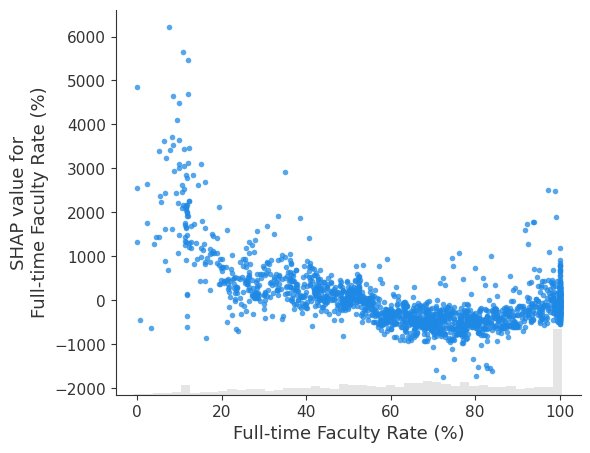

In [68]:
disp_feat = st.selectbox('Select a feature to display', options=X_filled.columns)
st.subheader(f'Scatterplot of {disp_feat} Contribution\n(SHAP scatterplot)')
shap.plots.scatter(shap_values[:, f'{disp_feat}'],show=True,
                   ylabel = "Expected Income contribution")
st.pyplot(plt.gcf())

Text(0.5, 0, 'Average impact on model output magnitude\n(mean(|SHAP value|))')

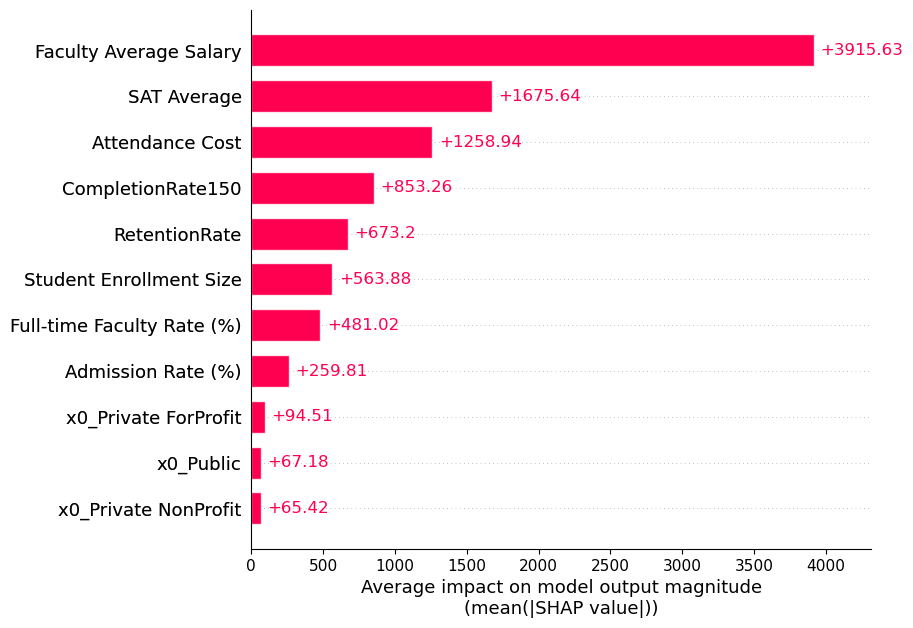

In [52]:
# feature importance plot
st.header('Feature Importance')
shap.plots.bar(shap_values,max_display = 15,show=False)
# shap.summary_plot(shap_values,plot_type = 'bar',show=False)
# as stated in documentation, setting show to false allows for further customization
# https://shap.readthedocs.io/en/latest/generated/shap.plots.bar.html
fig = plt.gca()
fig.set_xlabel("Average impact on model output magnitude\n(mean(|SHAP value|))")
# FIXME: change model output to 6 or 10 year income

In [ ]:
# example code to make plot into a function, and then be able to cache it
# @st.cache(hash_funcs={matplotlib.figure.Figure: lambda _: None})
# def summary_plot_all():
#     fig, axes = plt.subplots(nrows=1, ncols=1)
#     shap.summary_plot(shapvs[1], prep_train.iloc[:, :-1].values, 
#     prep_train.columns, max_display=50)
#     return fig

In [ ]:
# could also paste actually mean income metric(s) below graph showing expected income
## this metric of course is a function of completion rate, for students yet to complete will likely not have job
## and will not be included, as this data is "working not enrolled" 6 or 10 years post entry

In [ ]:
# could be cool addition: Cohort bar plot
# sex = [
#     "Women" if shap_values[i, "Sex"].data == 0 else "Men"
#     for i in range(shap_values.shape[0])
# ]
# shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))